# MMI 701: Multimedia Signal Processing
## Design of Digital Filters

- Let us first import the modules that we will need to use in the notebook.

In [107]:
import numpy as np
import scipy.signal as spsig
import matplotlib.pyplot as plt

### FIR filter design: Least-squares
- We will first design a symmetric filter of odd order which approximates in ideal response
- While the the ideal response we will use is non-sensical, we will see that the designed response closelyapproximates the ideal response
- We will also see that increasing the filter order will make the approximation progressively better

Text(0,0.5,'$|H(\\omega)|$')

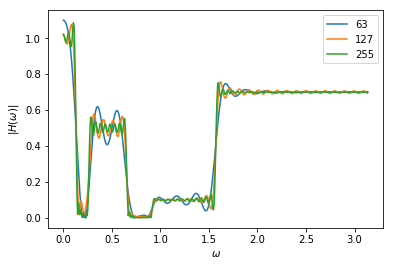

In [108]:
bands = [(0, 1000.), (1000., 2000.), (2000., 5000.), (5000., 7000.), (7000., 12000.), (12000, 24000)] # Band edges are input as tuples
desired = [(1, 1), (0, 0), (0.5, 0.5), (0, 0), (0.1, 0.1), (0.7, 0.7)] # Ditto for the desired response
fs = 48000. # Sampling rate needs to be provided

numtaps = [63, 127, 255] # The number of taps has to be odd for firls()
neval = 512

for nt in numtaps:
    B = spsig.firls(nt, bands, desired, fs=fs) # This is the least-squares design
    w, H = spsig.freqz(B, 512)
    plt.plot(w, np.abs(H)*neval, label=str(nt))

plt.legend()
plt.xlabel('$\omega$')
plt.ylabel('$|H(\omega)|$')

### FIR filter design: Windowing

- ```scipy.signal``` has two options for FIR filter design via windowing. We will use and compare both.
- Let us first plot several different window functions that we can use in the design. There are many different windows. We will just compare some of them

Text(0,0.5,'Amplitude')

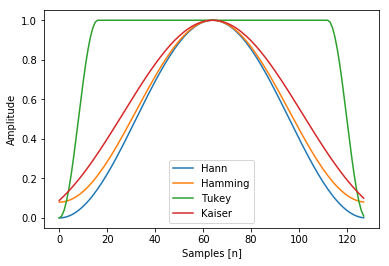

In [109]:
winlen = 128
hannwin = spsig.get_window('hann', winlen)
hammwin = spsig.get_window('hamming', winlen)
tukywin = spsig.get_window(('tukey', 0.25), winlen)
kaiswin = spsig.get_window(('kaiser', 4.0), winlen)

winds = [('Hann', hannwin), ('Hamming', hammwin), ('Tukey', tukywin), ('Kaiser', kaiswin)]

for win in winds:
    plt.plot(np.arange(winlen), win[1], label=win[0])
    
plt.legend()
plt.xlabel('Samples [n]')
plt.ylabel('Amplitude')

- Note the different sidelobes in different windows. We discussed the effects of these sidelobes in the lecture video.

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(-60, 0)

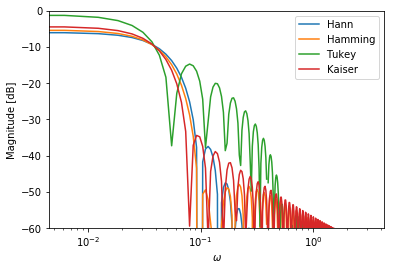

In [110]:
for win in winds:
    w, H = spsig.freqz(win[1], winlen)
    plt.semilogx(w, 20*np.log10(np.abs(H)), label=win[0])

plt.legend()
plt.xlabel('$\omega$')
plt.ylabel('Magnitude [dB]')
plt.ylim(-60,0)

- We will first design a lowpass filter with ```firwin()```

In [111]:
numtaps = 128
f = 0.2 # The cutoff frequency
B = spsig.firwin(numtaps, f, window='hann')

- Observe that $h(n)$ is symmetric
- Also observe that the magnitude response is low-pass
- Also observe that phase response is linear in the passband

Text(0,0.5,'Phase response [rad]')

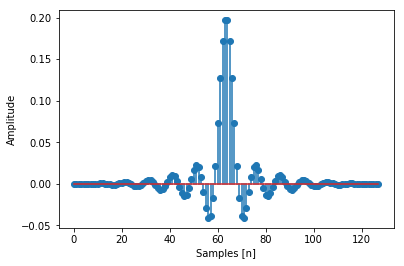

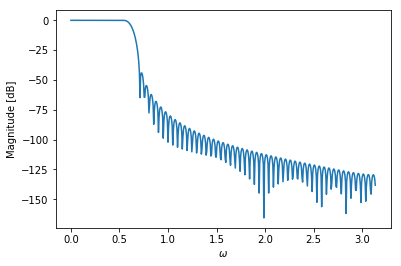

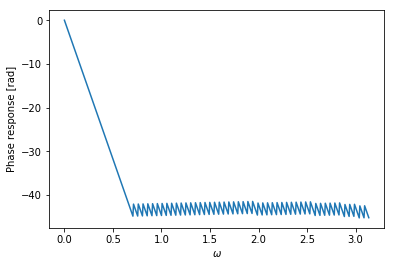

In [112]:
plt.stem(B)
plt.xlabel('Samples [n]')
plt.ylabel('Amplitude')

w, H = spsig.freqz(B, numtaps)
plt.figure()
plt.plot(w, 20*np.log10(np.abs(H)*numtaps))

plt.xlabel('$\omega$')
plt.ylabel('Magnitude [dB]')

plt.figure()
plt.plot(w, np.unwrap(np.angle(H)))
plt.xlabel('$\omega$')
plt.ylabel('Phase response [rad]')

- We can also design a bandpass filter using ```firwin()```

Text(0,0.5,'Phase response [rad]')

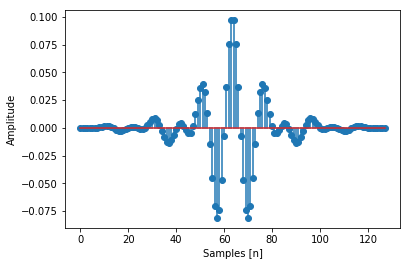

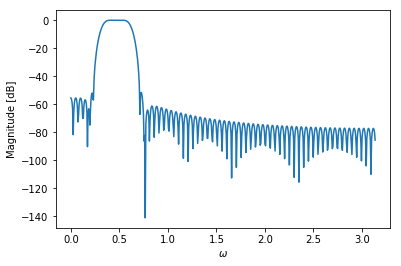

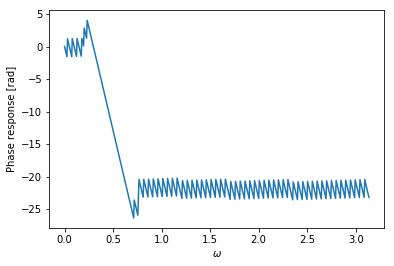

In [113]:
f1, f2 = 0.1, 0.2
B = spsig.firwin(numtaps, [f1, f2], pass_zero=False)

plt.stem(B)
plt.xlabel('Samples [n]')
plt.ylabel('Amplitude')

w, H = spsig.freqz(B, numtaps)
plt.figure()
plt.plot(w, 20*np.log10(np.abs(H)*numtaps))

plt.xlabel('$\omega$')
plt.ylabel('Magnitude [dB]')

plt.figure()
plt.plot(w, np.unwrap(np.angle(H)))
plt.xlabel('$\omega$')
plt.ylabel('Phase response [rad]')

- ```firwin2()```is slightly different in that it is possible to specify sampled frequency response in a way similar to ```firls()```
- Notice the linear-phase response in the two pass-bands

Text(0,0.5,'Phase response [rad]')

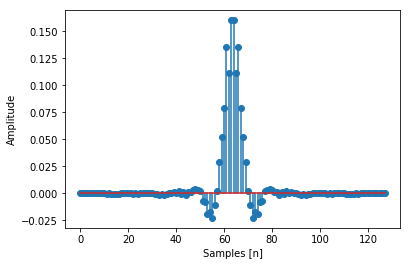

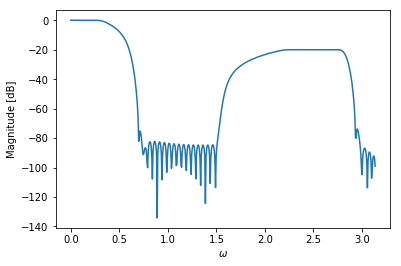

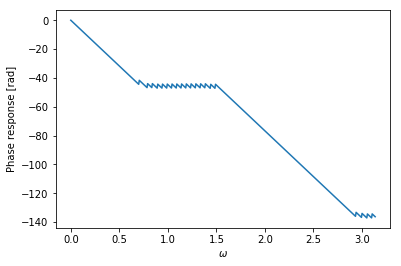

In [114]:
B = spsig.firwin2(numtaps, [0.0, 0.1, 0.2, 0.5, 0.7, 0.9, 0.91, 1.0], [1.0, 1.0, 0.0, 0.0, 0.1, 0.1, 0., 0.])
plt.stem(B)
plt.xlabel('Samples [n]')
plt.ylabel('Amplitude')

w, H = spsig.freqz(B, numtaps)
plt.figure()
plt.plot(w, 20*np.log10(np.abs(H)*numtaps))

plt.xlabel('$\omega$')
plt.ylabel('Magnitude [dB]')

plt.figure()
plt.plot(w, np.unwrap(np.angle(H)))
plt.xlabel('$\omega$')
plt.ylabel('Phase response [rad]')

### FIR filter design: Optimum Equiripple Linear-phase FIR filter design
- We use the Remez exchange algorithm (which will not be covered in detail in this course)
- This is implemented as ```remez()``` in ```scipy.signal```

Text(0,0.5,'Phase response [rad]')

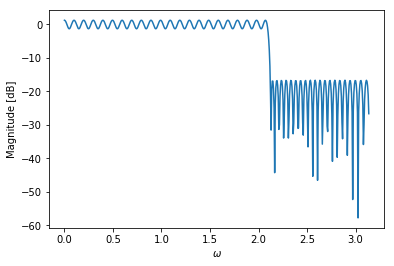

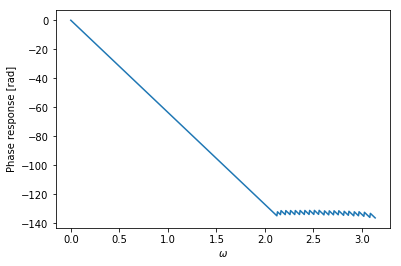

In [118]:
fs = 48000.
fc = 16000.0    
tband = 200  # Bandwidth of the transition band
B = spsig.remez(numtaps, [0, fc, fc + tband, fs/2], [1, 0], fs=fs)

w, H = spsig.freqz(B, numtaps)
plt.figure()
plt.plot(w, 20*np.log10(np.abs(H)*numtaps))

plt.xlabel('$\omega$')
plt.ylabel('Magnitude [dB]')

plt.figure()
plt.plot(w, np.unwrap(np.angle(H)))
plt.xlabel('$\omega$')
plt.ylabel('Phase response [rad]')

### IIR Filter Design from analog designs
- Let us first design Butterworth, Chebyshev, Bessel and Elliptic filters, which are all low-pass filters 
- We will use ```butter()```, ```bessel()```, ```cheby1()```, ```cheby2()``` and ```ellip()```
- Observe the differences in the magnitude responses of different filters

In [151]:
order = 11
filtlist = []
B, A = spsig.butter(order, 0.1)
filtlist.append(('Butterworth', B, A))
B, A = spsig.bessel(order, 0.1)
filtlist.append(('Bessel', B, A))
B, A = spsig.cheby1(order, 5, 0.1)
filtlist.append(('Chebyshev (Type 1)', B, A))
B, A = spsig.cheby2(order, 50, 0.1)
filtlist.append(('Chebyshev (Type 2)', B, A))

Text(0,0.5,'Magnitude [dB]')

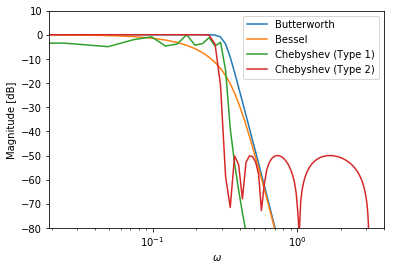

In [152]:
for filt in filtlist:
    w, H = spsig.freqz(filt[1], filt[2], numtaps)
    plt.semilogx(w, 20*np.log10(np.abs(H)), label=filt[0])
    
plt.legend()
plt.ylim(-80,10)
plt.xlabel('$\omega$')
plt.ylabel('Magnitude [dB]')

- There are mny other filter design methods which would require a course on its own to cover. ```scipy.signal``` maintains a good list of such methods that you can check.

#### © 2020, Huseyin Hacihabiboglu, (hhuseyin@metu.edu.tr), METU Graduate School of Informatics